In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
font = {'size': 14}
matplotlib.rc('font', **font)
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline,interp1d
import pandas as pd
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /Users/amkpd/Library/CloudStorage/OneDrive-SwanseaUniversity/Codes/OpenQuintessence/CAMB_base/CAMB/camb


### Testing $V(\Phi)=V_0 \exp(-\lambda \phi) + \Lambda$

#### Through the python interface

EarlyQuintessence: lambda = 0.25
EarlyQuintessence: thetamc =  0.010439583804027312
{'K': 0.0, 'cdm': 0.27018200037459084, 'baryon': 0.04872134432984425, 'photon': 5.476667384872596e-05, 'neutrino': 2.5240670220166704e-05, 'nu': 0.001428125737525537, 'de': 0.6795885222139705}
Sum of energy densities = 1.0

EarlyQuintessence: lambda = 0.75
EarlyQuintessence: thetamc =  0.010480041556689551
{'K': 0.0, 'cdm': 0.27017612890347714, 'baryon': 0.048720285539971285, 'photon': 5.476548368452904e-05, 'neutrino': 2.5240121701516746e-05, 'nu': 0.0014280947021530733, 'de': 0.6795954852490125}
Sum of energy densities = 1.0

EarlyQuintessence: lambda = 1.25
EarlyQuintessence: thetamc =  0.010579498174908707
{'K': 0.0, 'cdm': 0.27018678948329306, 'baryon': 0.04872220793961022, 'photon': 5.476764461492784e-05, 'neutrino': 2.524111762344758e-05, 'nu': 0.0014281510517559002, 'de': 0.6795828427631024}
Sum of energy densities = 1.0

EarlyQuintessence: lambda = 2.0
EarlyQuintessence: thetamc =  0.0111009918

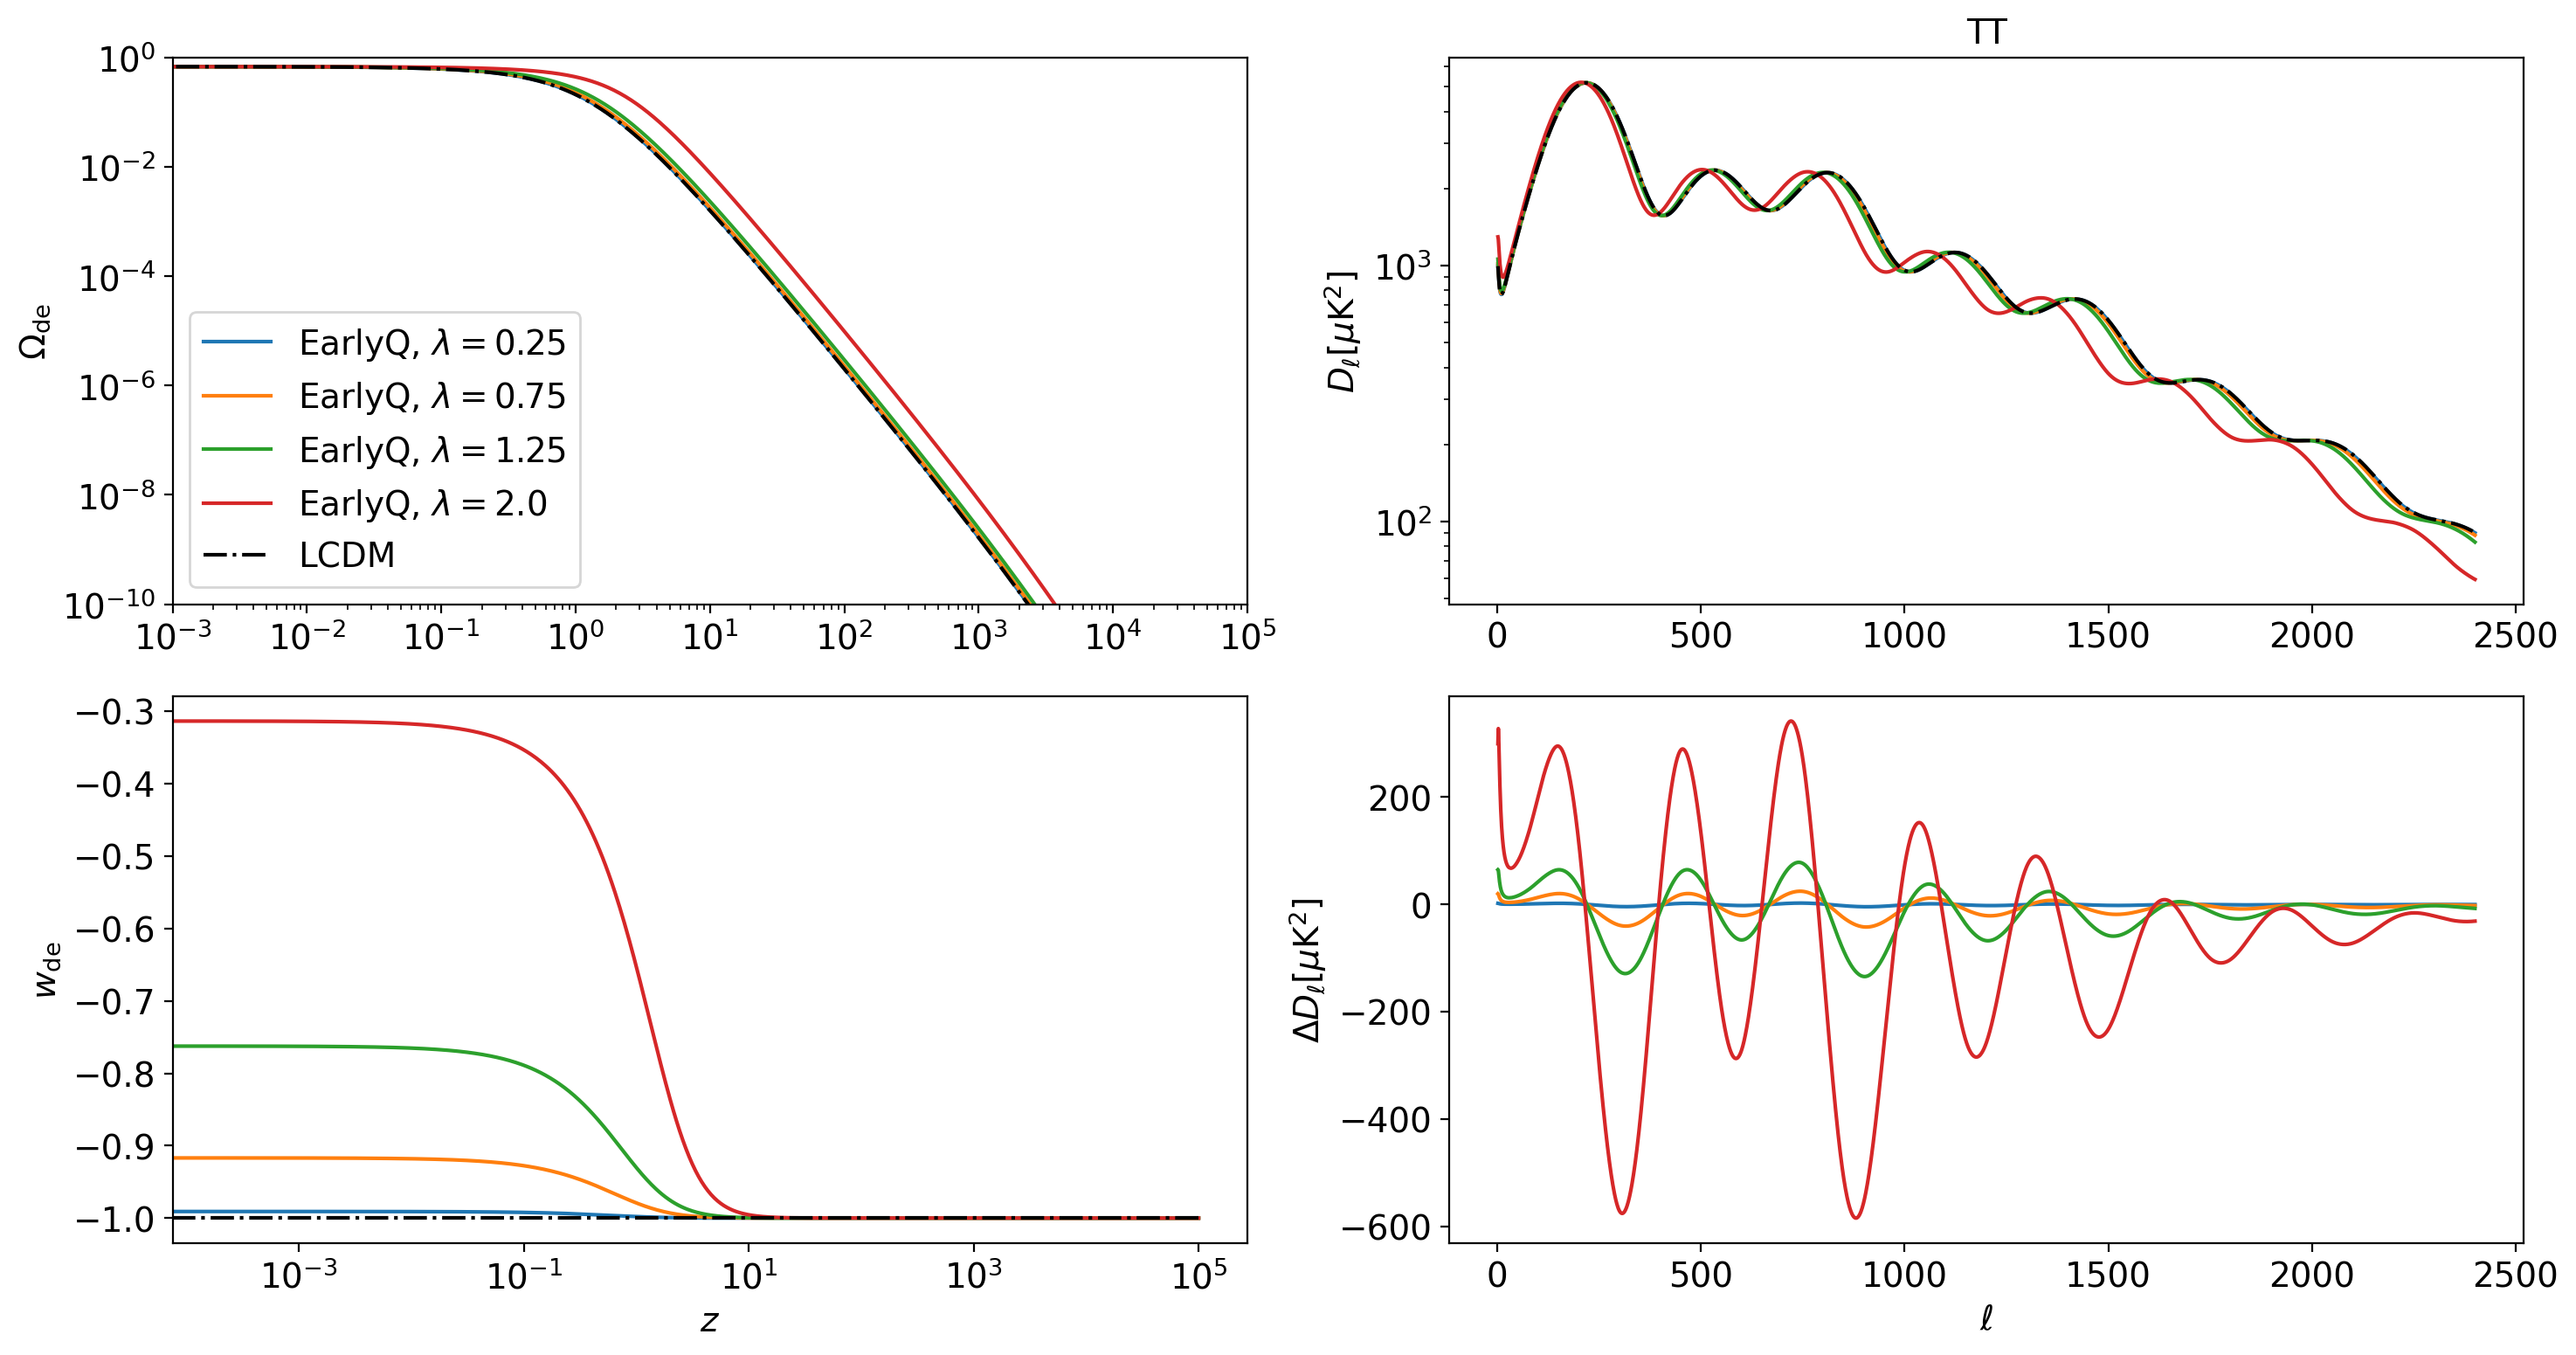

In [27]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))

fontsize = 14

fig, ax = plt.subplots(2,2, figsize=(15,8))
axs1 = ax[1,1]
axs = ax[1,0]
ax0 = ax[0,0]
ax01 = ax[0,1]
ax01.set_ylabel(r'$ D_\ell [\mu {\rm K}^2]$',fontsize=fontsize)
ax01.set_title('TT',fontsize=fontsize)
axs1.set_ylabel(r'$\Delta D_\ell [\mu {\rm K}^2]$',fontsize=fontsize)
axs1.set_xlabel(r'$\ell$',fontsize=fontsize)

pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars)
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(cl_LCDM.shape[0])


n=0.25
theta_i = 0.
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2)
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)


n=0.75
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = results.get_dark_energy_rho_w(1/(1+zs))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# ax0.set_ylim(0.,0.1)
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)

n=1.25
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = results.get_dark_energy_rho_w(1/(1+zs))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# ax0.set_ylim(0.,0.1)
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)

n=2.
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = results.get_dark_energy_rho_w(1/(1+zs))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# ax0.set_ylim(0.,0.1)
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)


print('LCDM: thetamc = ', results_LCDM.cosmomc_theta())
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
ax01.plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax0.semilogx(zs,results_LCDM.get_Omega('de',z=zs),label='LCDM',color='k',ls='-.')
axs.semilogx(zs,wde[:,1],color='k',ls='-.')

# axs.axhline(1.,color='k',ls=':')
ax0.set_xlim(1e-3,1e5)
ax0.set_ylim(1e-10,1.)
axs.set_xlabel(r'$z$',fontsize=fontsize)
ax0.set_ylabel(r'$\Omega_{\rm de}$',fontsize=fontsize)
axs.set_ylabel(r'$w_{\rm de}$',fontsize=fontsize)
axs.set_xlabel(r'$z$')
# axs.set_yscale('log')
ax0.set_yscale('log')
ax01.set_yscale('log')
ax0.legend()
# axs1.legend()
# ax01.legend()
fig.tight_layout()


#### Field evolution, $(\phi,\dot\phi)$

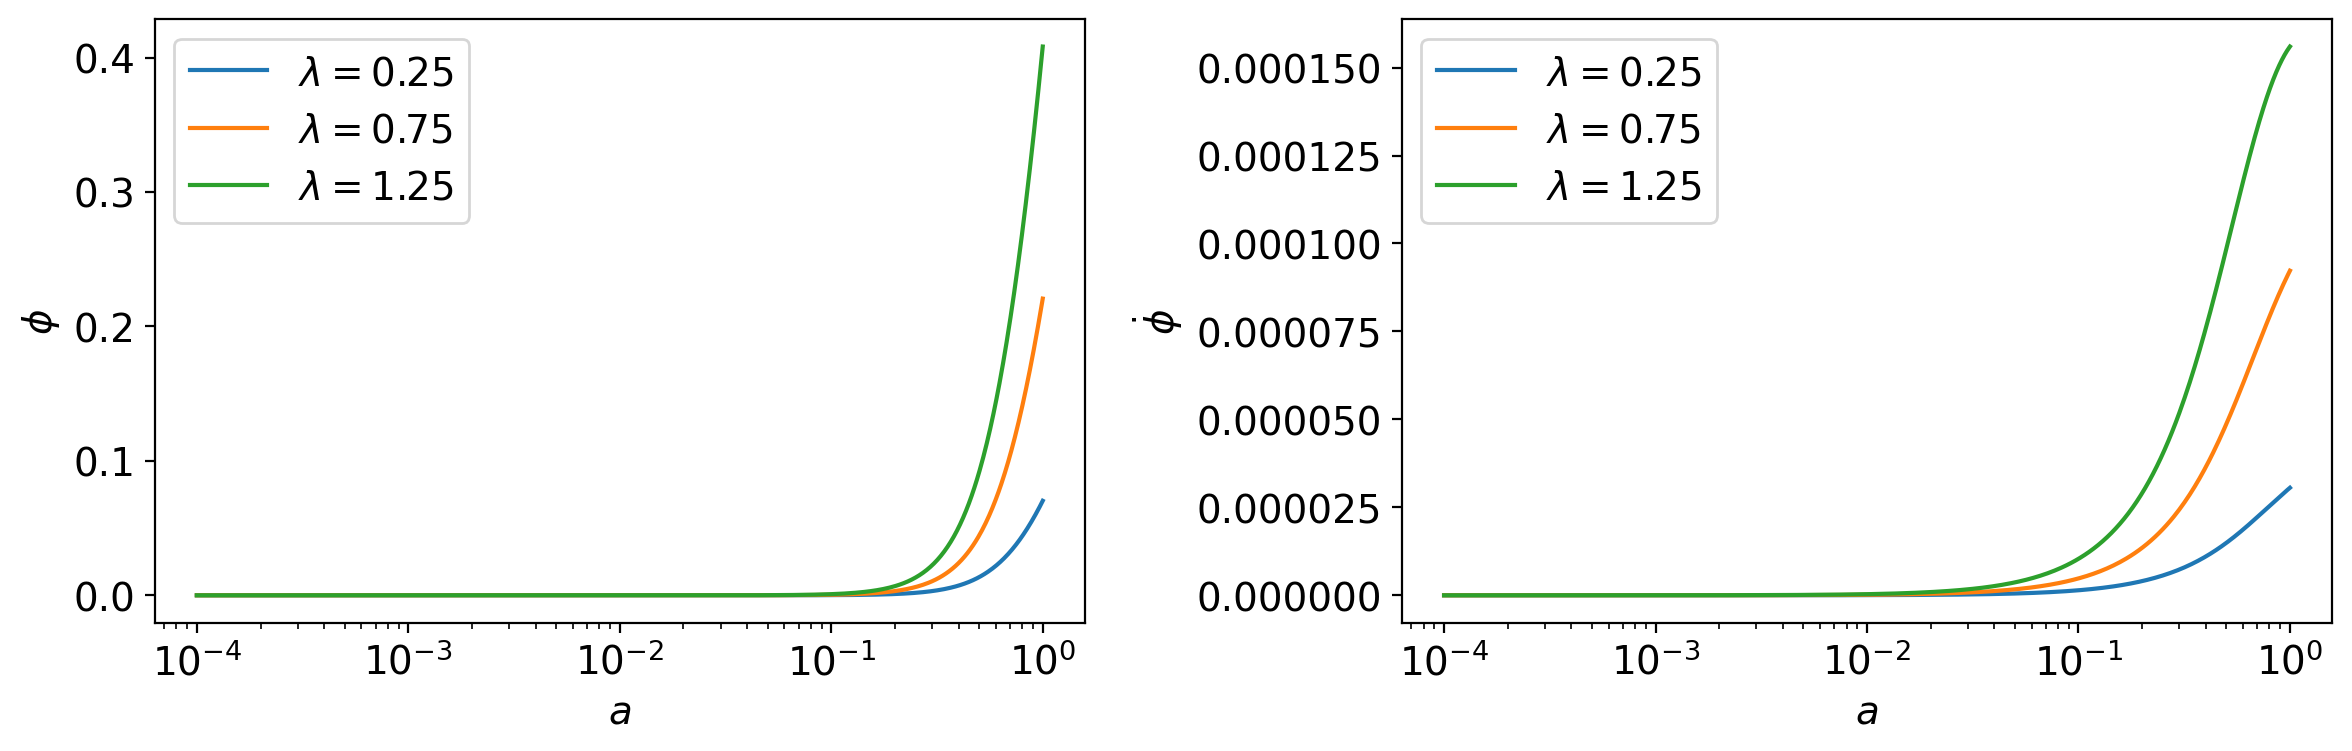

In [29]:
z1 = np.logspace(4,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,2,figsize=(12,4))

ns = [0.25,0.75,1.25]
for n in ns:
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
    results = camb.get_results(pars)
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[0].semilogx(scales,ev_phi[:,0],label=r'$\lambda=%s$'%n)
    ax[1].semilogx(scales,ev_phi[:,1]/scales,label=r'$\lambda=%s$'%n)

ax[0].set_xlabel(r'$a$')
ax[0].set_ylabel(r'$\phi$')
ax[0].legend()
ax[1].set_xlabel(r'$a$')
ax[1].set_ylabel(r'$\dot{\phi}$')
ax[1].legend()
fig.tight_layout()
# # phi0 = ev_phi[0,0]

# print(np.shape(ev_phi))

# print(phi0)

# plt.plot(zs,ev_phi[:,0])
# plt.plot(zs,ev_phi[:,1]/scales)
# plt.xscale('log')

#### $\Omega_K = 0.05$

EarlyQuintessence: lambda = 0.25
EarlyQuintessence: thetamc =  0.00978030974250856
{'K': 0.05000367396730327, 'cdm': 0.27017999858325353, 'baryon': 0.0487209833510785, 'photon': 5.476626807982525e-05, 'neutrino': 2.5240483210836235e-05, 'nu': 0.0014281151564737792, 'de': 0.6295872221906004}
Sum of energy densities = 1.0

EarlyQuintessence: lambda = 0.75
EarlyQuintessence: thetamc =  0.009814927779075642
{'K': 0.05000462828714707, 'cdm': 0.27018515496704676, 'baryon': 0.04872191319077892, 'photon': 5.4767313293751604e-05, 'neutrino': 2.5240964925320075e-05, 'nu': 0.001428142412043719, 'de': 0.6295801528647644}
Sum of energy densities = 1.0

EarlyQuintessence: lambda = 1.25
EarlyQuintessence: thetamc =  0.009898771191505142
{'K': 0.05000351890084886, 'cdm': 0.27017916072772996, 'baryon': 0.04872083226237753, 'photon': 5.476609824408442e-05, 'neutrino': 2.5240404937542925e-05, 'nu': 0.0014281107277441234, 'de': 0.6295883708781179}
Sum of energy densities = 1.0

EarlyQuintessence: lambda =

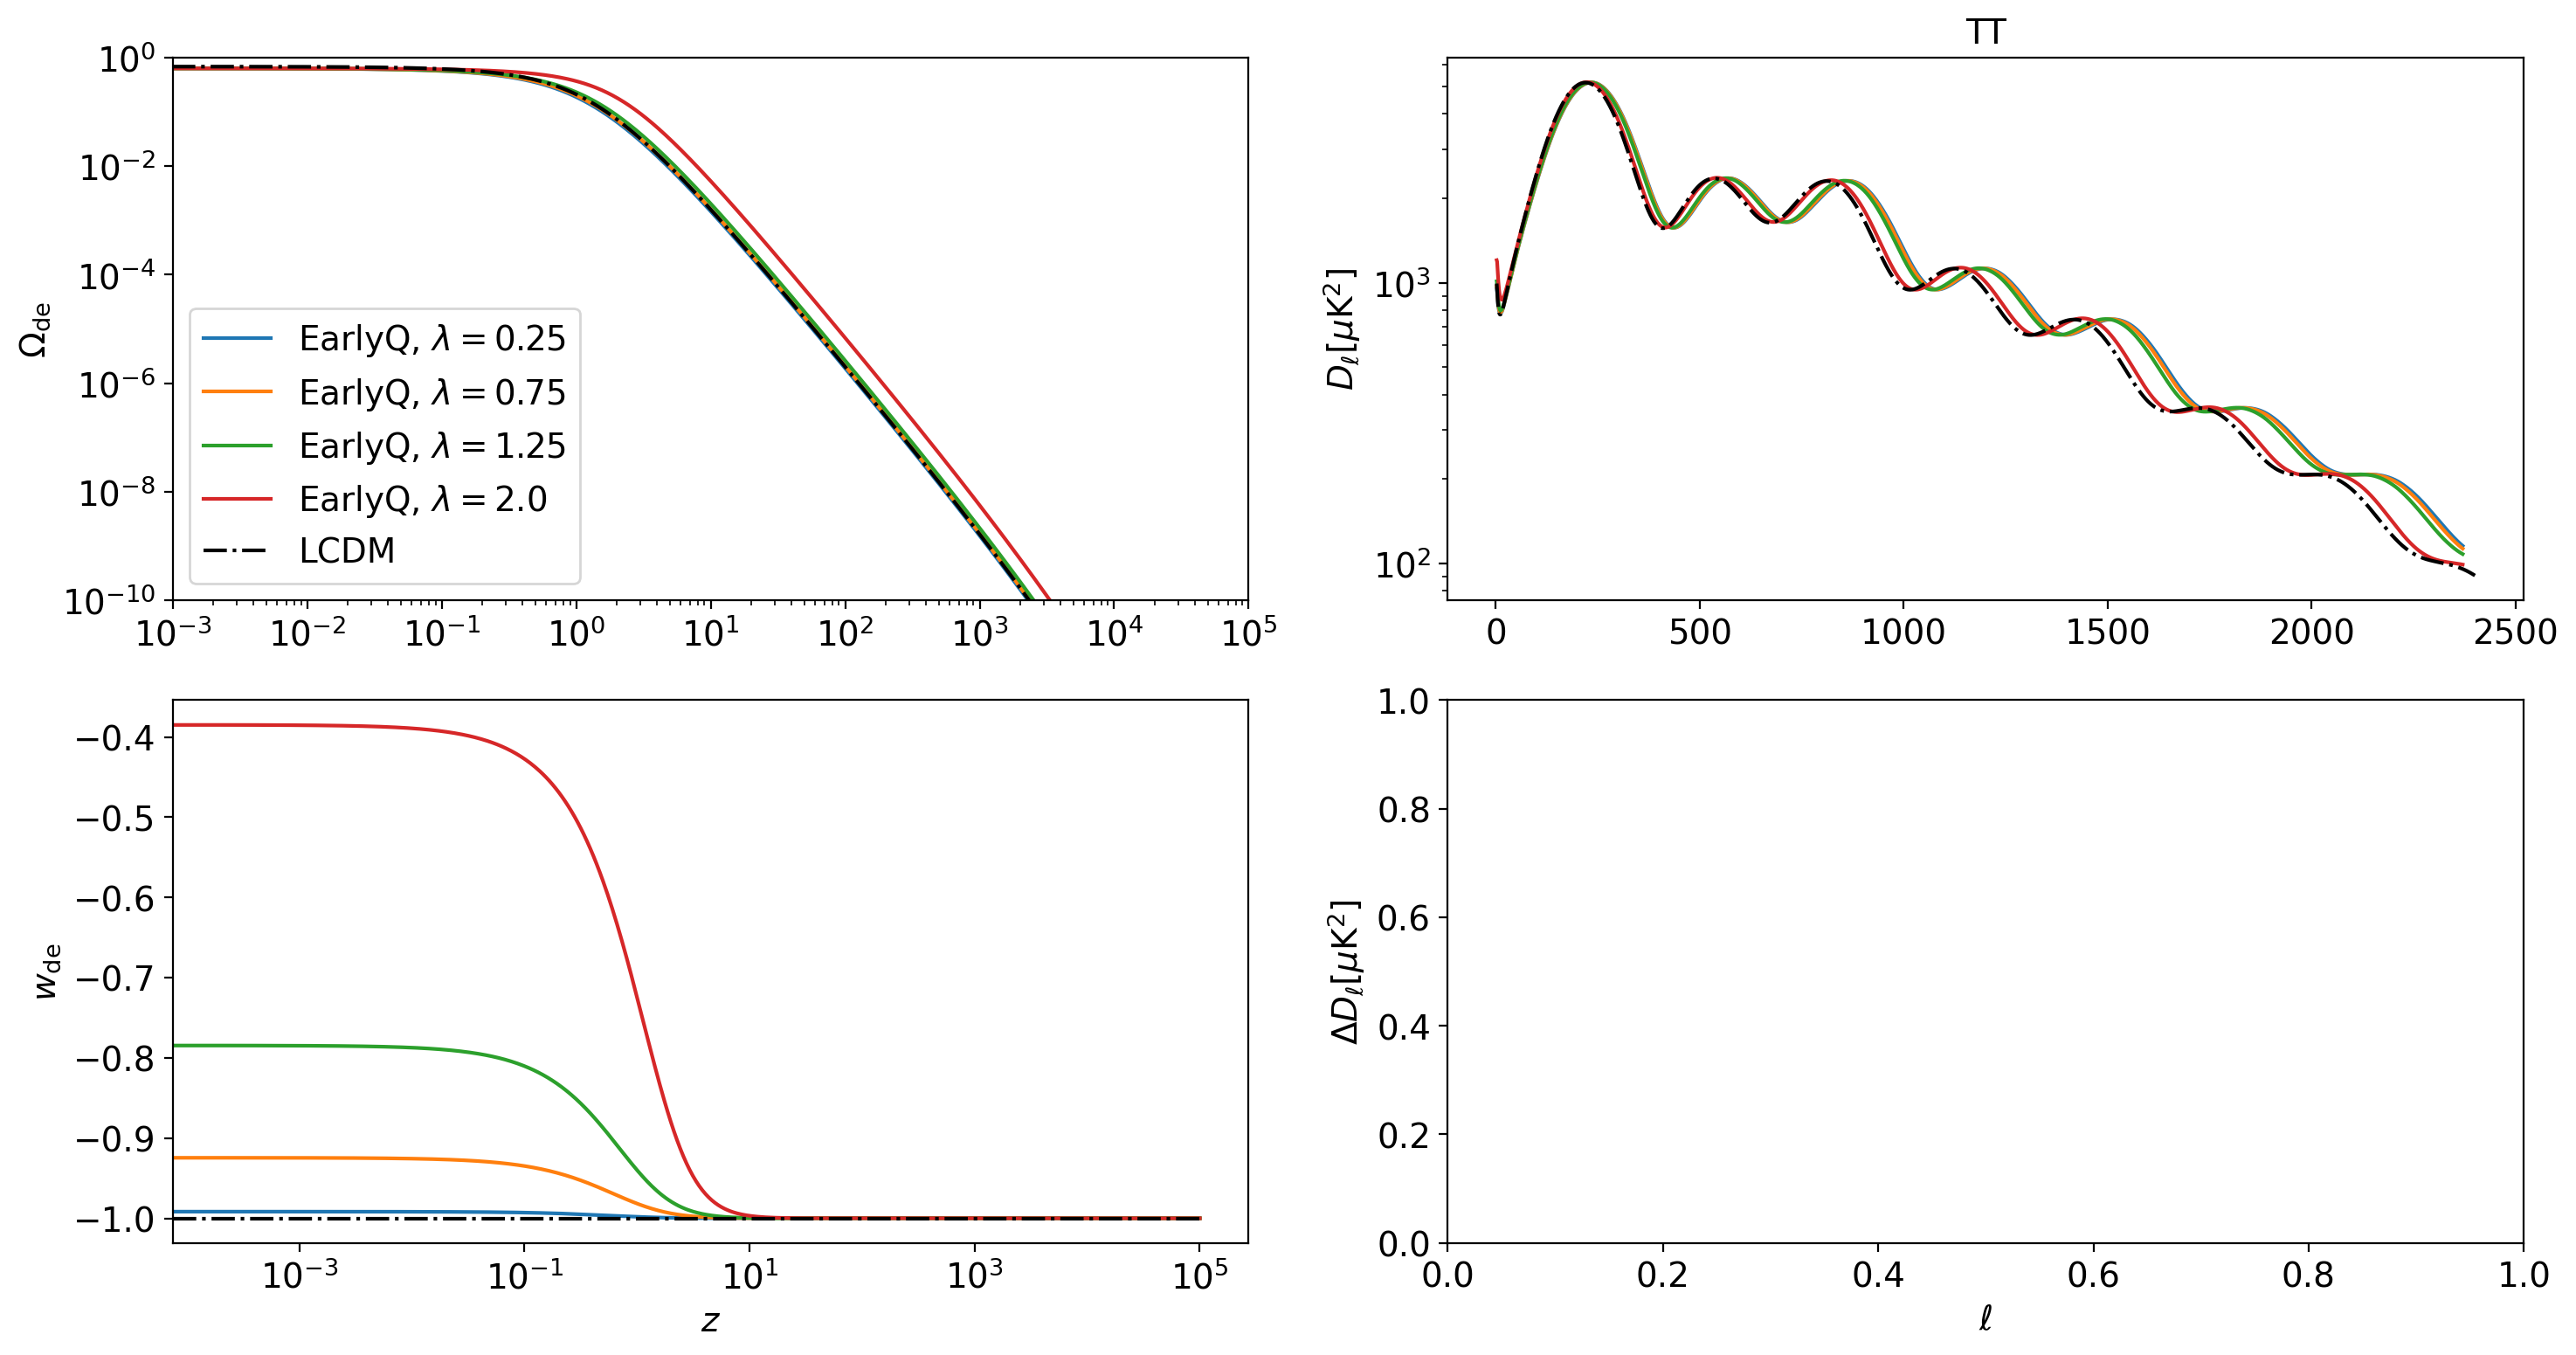

In [33]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))

omk = 0.05

fontsize = 14

fig, ax = plt.subplots(2,2, figsize=(15,8))
axs1 = ax[1,1]
axs = ax[1,0]
ax0 = ax[0,0]
ax01 = ax[0,1]
ax01.set_ylabel(r'$ D_\ell [\mu {\rm K}^2]$',fontsize=fontsize)
ax01.set_title('TT',fontsize=fontsize)
axs1.set_ylabel(r'$\Delta D_\ell [\mu {\rm K}^2]$',fontsize=fontsize)
axs1.set_xlabel(r'$\ell$',fontsize=fontsize)

pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars)
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')



n=0.25
theta_i = 0.
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=omk,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2)
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)


n=0.75
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=omk,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = results.get_dark_energy_rho_w(1/(1+zs))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# ax0.set_ylim(0.,0.1)
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
# axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)

n=1.25
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=omk,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = results.get_dark_energy_rho_w(1/(1+zs))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# ax0.set_ylim(0.,0.1)
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
# axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)

n=2.
pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=omk,
                       n=n,  theta_i=theta_i,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
results = camb.get_results(pars)
print('EarlyQuintessence: lambda = %s'%n)
print('EarlyQuintessence: thetamc = ', results.cosmomc_theta())
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
wde = results.get_dark_energy_rho_w(1/(1+zs))
wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
# zs = np.logspace(5,2,500)
axs.semilogx(zs,wde[:,1])
ax0.semilogx(zs,results.get_Omega('de',z=zs),label='EarlyQ, $\\lambda=%s$'%n)
# ax0.set_ylim(0.,0.1)
cl = results.get_lensed_scalar_cls(CMB_unit='muK')
ls = np.arange(0,cl.shape[0])
# print(np.shape(ls))
# axs1.plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n)
ax01.plot(ls[2:],cl[2:,0],label='EarlyQ, $\\lambda=%s$'%n)


print('LCDM: thetamc = ', results_LCDM.cosmomc_theta())
ls = np.arange(cl_LCDM.shape[0])
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
print(dict(zip(om,omega0)))
print('Sum of energy densities = {}\n'.format(sum(omega0)))
ax01.plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax0.semilogx(zs,results_LCDM.get_Omega('de',z=zs),label='LCDM',color='k',ls='-.')
axs.semilogx(zs,wde[:,1],color='k',ls='-.')

# axs.axhline(1.,color='k',ls=':')
ax0.set_xlim(1e-3,1e5)
ax0.set_ylim(1e-10,1.)
axs.set_xlabel(r'$z$',fontsize=fontsize)
ax0.set_ylabel(r'$\Omega_{\rm de}$',fontsize=fontsize)
axs.set_ylabel(r'$w_{\rm de}$',fontsize=fontsize)
axs.set_xlabel(r'$z$')
# axs.set_yscale('log')
ax0.set_yscale('log')
ax01.set_yscale('log')
ax0.legend()
# axs1.legend()
# ax01.legend()
fig.tight_layout()
